# This section uses Magpie to calculate surface brightness profile

This is equivalently what the previous section does, but magpie is used to calculate surface brightness profile for each Ha Hb line maps and weights, averaged out over the polar angle phi, for each given pixel distance.

In [2]:
import  magpie              as     magpie
import  numpy               as     np
from    astropy.table       import Table
from    astropy.io          import fits
from    astropy.cosmology   import Planck18
import  astropy.units       as     u
import  matplotlib.pyplot   as     plt
import  matplotlib.colors   as     colors  
from    tqdm                import tqdm



#this is just a handy little function to return the desired file path
#give one entry in the object list, return the desired file path
def file_path(obj,prefix,filetype='fits'):
    if   filetype == 'fits':
        return f"data/{obj['field']}/{obj['field']}_{str(obj['id']).zfill(5)}.{prefix}.{filetype}"
    elif filetype == 'png':
        return f"png/{obj['field']}/{obj['field']}_{str(obj['id']).zfill(5)}.{prefix}.{filetype}"

In [37]:

import magpie.montecarlo


def spatial_remap(obj,map,weight_map=False):
    pixel_length = np.deg2rad(0.04/3600) * Planck18.angular_diameter_distance(obj['redshift']).to(u.kpc)

    b2r = magpie.montecarlo.Box2Ring()
    b2r.setup_box(-25*pixel_length,25*pixel_length,50,
                -25*pixel_length,25*pixel_length,50)
    b2r.setup_polar_lin(0., 25*pixel_length, 12, 10, center=[0., 0.])
    b2r.get_weights() 
    remap = b2r.remap(map)

    if weight_map == True:
        err = 1/np.sum(remap,axis=0)**0.5
        return err
    else:
        r     = np.linspace(b2r.redges[0], b2r.redges[-1],12)
        map_r = np.average(remap,axis=0)
        map_r_std = np.std(remap,axis=0)
        return r,map_r,map_r_std
    

def radial_profile(obj,linemap,weight):
        linemap = linemap.data; weight = weight.data
        r, linemap_r, linemap_r_std = spatial_remap(obj,np.where(linemap>0,linemap,0))
        linemap_r_err = spatial_remap(obj,np.where(linemap>0,weight,0),weight_map=True)
        linemap_r_err = (linemap_r_err**2 + linemap_r_std**2)**0.5
        return r, linemap_r, linemap_r_err 


In [ ]:
obj_lis = Table.read('spectra-fitting_selected_psfmatched.fits')
i= 3
for obj in tqdm(obj_lis[i:i+1]):
    path = file_path(obj=obj,prefix='extracted')
    with fits.open(path) as hdu:
        r, ha_r, ha_r_err = radial_profile(obj,hdu[4],hdu[5])
        r, hb_r, hb_r_err = radial_profile(obj,hdu[11],hdu[7])
        r, hb_r, hb_r_err = radial_profile(obj,hdu[6],hdu[7])
        balmer_r     = ha_r/hb_r
        balmer_r_err = ((ha_r_err/hb_r)**2 + (hb_r_err**2 * (ha_r/hb_r**2)**2))**0.5

  0%|          | 0/1 [00:00<?, ?it/s]

Calculating weights : |##################################################| 100% 
Remapping : |##################################################| 100% 
Calculating weights : |##################################################| 100% 
Remapping : |##################################################| 100% 
Calculating weights : |##################################################| 100% 
Remapping : |##################################################| 100% 
Calculating weights : |##################################################| 100% 
Remapping : |##################################################| 100% 
Calculating weights : |##################################################| 100% 
Remapping : |##################################################| 100% 
Calculating weights : |##################################################| 100% 
Remapping : |##################################################| 100% 


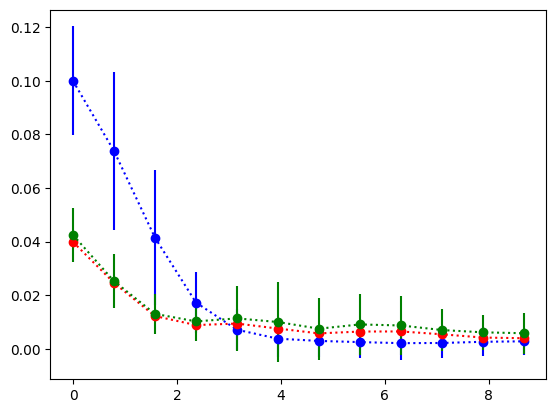

100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


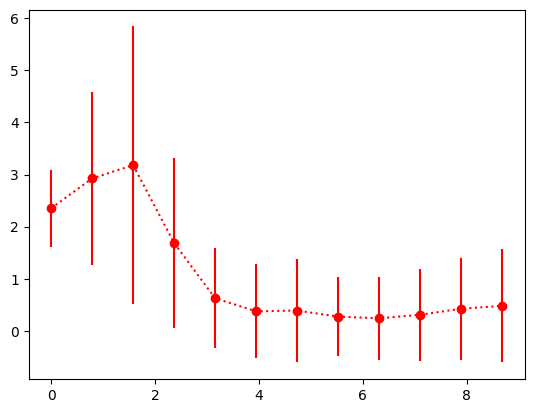

In [45]:
obj_lis = Table.read('spectra-fitting_selected_psfmatched.fits')
i= 3
for obj in tqdm(obj_lis[i:i+1]):
    path = file_path(obj=obj,prefix='extracted')
    with fits.open(path) as hdu:
        r,ha_r,ha_r_err = radial_profile(obj,hdu[4],hdu[5])
        plt.errorbar(r,ha_r,yerr = ha_r_err,fmt='bo:')
        
        r, hb_r, hb_r_err = radial_profile(obj,hdu[11],hdu[7])
        plt.errorbar(r,hb_r,yerr = hb_r_err/1000,fmt='ro:')

        r, hb_r, hb_r_err = radial_profile(obj,hdu[6],hdu[7])
        plt.errorbar(r,hb_r,yerr = hb_r_err,fmt='go:')
        plt.show()

        balmer_r     = ha_r/hb_r
        balmer_r_err = ((ha_r_err/hb_r)**2 + (hb_r_err**2 * (ha_r/hb_r**2)**2))**0.5
        plt.errorbar(r,balmer_r,yerr = balmer_r_err,fmt='ro:')



In [41]:
plt.plot(np.sum(radial_ha,axis=0))
plt.xlim(0,20)
b2r

NameError: name 'radial_ha' is not defined